In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

from lightgbm import LGBMClassifier

# 1) Prep Data

In [5]:
# Load labeled data
df = pd.read_csv('../labeled/labeledData.csv')

print(f"Dataset shape: {df.shape}")
print(f"\nColumn names: {df.columns.tolist()}")

df.head()

Dataset shape: (2582, 39)

Column names: ['Unnamed: 0', 'isExoplanet', 'loc_rowid', 'toi', 'tid', 'ra', 'dec', 'st_pmra', 'st_pmraerr1', 'st_pmraerr2', 'st_pmdec', 'st_pmdecerr1', 'st_pmdecerr2', 'pl_tranmid', 'pl_tranmiderr1', 'pl_tranmiderr2', 'pl_orbper', 'pl_orbpererr1', 'pl_orbpererr2', 'pl_trandurh', 'pl_trandurherr1', 'pl_trandurherr2', 'pl_trandep', 'pl_trandeperr1', 'pl_trandeperr2', 'pl_rade', 'pl_insol', 'pl_eqt', 'st_tmag', 'st_tmagerr1', 'st_tmagerr2', 'st_dist', 'st_disterr1', 'st_disterr2', 'st_teff', 'st_tefferr1', 'st_tefferr2', 'st_logg', 'st_rad']


,Unnamed: 0,isExoplanet,loc_rowid,toi,tid,ra,dec,st_pmra,st_pmraerr1,st_pmraerr2,...,st_tmagerr1,st_tmagerr2,st_dist,st_disterr1,st_disterr2,st_teff,st_tefferr1,st_tefferr2,st_logg,st_rad
0,0,F,0.000000,0.121493,0.025595,0.312370,0.441976,1.0,0.014996,1.0,...,0.021821,1.0,0.064991,1.0,1.0,0.701740,0.041584,1.0,1.0,0.235035
1,2828,F,0.367579,0.450701,0.067247,0.331867,0.290722,1.0,0.008355,1.0,...,0.011750,1.0,0.075878,1.0,1.0,0.202685,0.015959,1.0,1.0,0.363145
2,2827,F,0.367449,0.450566,0.121039,0.295884,0.229987,1.0,0.003428,1.0,...,0.010071,1.0,0.037440,1.0,1.0,0.152683,0.018787,1.0,1.0,0.072645
3,2815,F,0.365889,0.449079,0.144183,0.358118,0.357285,1.0,0.004713,1.0,...,0.010071,1.0,0.133968,1.0,1.0,0.359782,0.018963,1.0,1.0,0.188159
4,2814,F,0.365759,0.448944,0.073676,0.339228,0.335514,1.0,0.006427,1.0,...,0.026857,1.0,0.545757,1.0,1.0,0.640394,0.013020,1.0,1.0,0.246945


In [27]:
# Separate features and target
X = df.drop('isExoplanet', axis=1)  
y = df['isExoplanet']  

print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")
print(f"\nTarget distribution:\n{y.value_counts()}")

Sanitized df.columns -> ['Unnamed_0', 'isExoplanet', 'loc_rowid', 'toi', 'tid', 'ra', 'dec', 'st_pmra', 'st_pmraerr1', 'st_pmraerr2', 'st_pmdec', 'st_pmdecerr1', 'st_pmdecerr2', 'pl_tranmid', 'pl_tranmiderr1', 'pl_tranmiderr2', 'pl_orbper', 'pl_orbpererr1', 'pl_orbpererr2', 'pl_trandurh', 'pl_trandurherr1', 'pl_trandurherr2', 'pl_trandep', 'pl_trandeperr1', 'pl_trandeperr2', 'pl_rade', 'pl_insol', 'pl_eqt', 'st_tmag', 'st_tmagerr1', 'st_tmagerr2', 'st_dist', 'st_disterr1', 'st_disterr2', 'st_teff', 'st_tefferr1', 'st_tefferr2', 'st_logg', 'st_rad']


In [38]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

## 2) Train Random Forest Classifier

In [45]:
lgb = LGBMClassifier(
    n_estimators=100,      
    max_depth=None,        
    num_leaves=31,          # LightGBM main complexity parameter
    min_child_samples=20,   # Like min_samples_leaf
    subsample=1.0,
    colsample_bytree=1.0,
    random_state=42,
    n_jobs=-1              # Use all available processors
)

lgb.fit(X_train, y_train)


[LightGBM] [Info] Number of positive: 1026, number of negative: 1039
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000534 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5851
[LightGBM] [Info] Number of data points in the train set: 2065, number of used features: 26
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.496852 -> initscore=-0.012591
[LightGBM] [Info] Start training from score -0.012591


,boosting_type,'gbdt'
,num_leaves,31
,max_depth,None
,learning_rate,0.1
,n_estimators,100
,subsample_for_bin,200000
,objective,None
,class_weight,None
,min_split_gain,0.0
,min_child_weight,0.001
,min_child_samples,20


In [46]:
# Perform cross-validation with 5 folds
cv_scores = cross_val_score(lgb, X_train, y_train, cv=5, scoring='accuracy')

print("Cross-Validation Scores:")
print(f"\nMean Accuracy: {cv_scores.mean():.4f}")
print(f"Standard Deviation: {cv_scores.std():.4f}")


[LightGBM] [Info] Number of positive: 820, number of negative: 832
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000616 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5732
[LightGBM] [Info] Number of data points in the train set: 1652, number of used features: 26
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.496368 -> initscore=-0.014528
[LightGBM] [Info] Start training from score -0.014528
[LightGBM] [Info] Number of positive: 821, number of negative: 831
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000401 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5730
[LightGBM] [Info] Number of data points in the train set: 1652, number of used features: 26
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.496973 -> initscore=-0.012107
[LightGBM] [Info] Start training from score -0.012107
[LightGBM] [Info] Numb

In [50]:
#predict
y_pred = lgb.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}\n")

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))



Accuracy: 0.8820

Classification Report:
              precision    recall  f1-score   support

           F       0.92      0.84      0.88       260
           P       0.85      0.92      0.89       257

    accuracy                           0.88       517
   macro avg       0.88      0.88      0.88       517
weighted avg       0.88      0.88      0.88       517



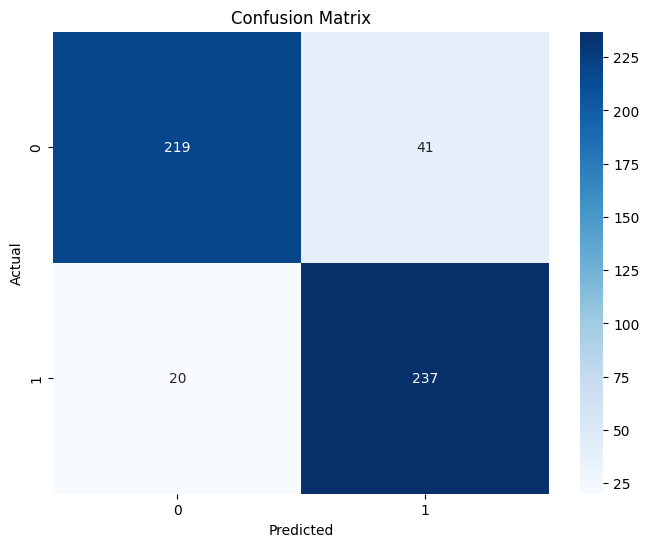

In [48]:
# Plot confusion matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=True)
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

Top 10 Most Important Features:
            feature  importance
18      pl_trandurh         244
24          pl_rade         209
16    pl_orbpererr1         199
21       pl_trandep         170
27          st_tmag         164
12       pl_tranmid         163
19  pl_trandurherr1         151
5               dec         145
13   pl_tranmiderr1         132
4                ra         125


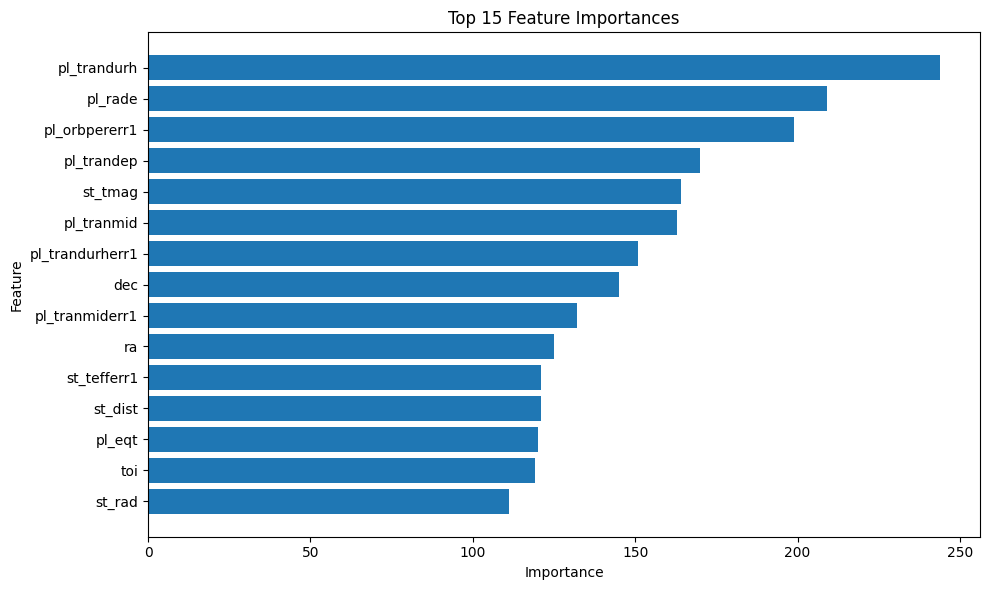

In [49]:
# Get feature importances
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': lgb.feature_importances_
}).sort_values('importance', ascending=False)

print("Top 10 Most Important Features:")
print(feature_importance.head(10))

plt.figure(figsize=(10, 6))
top_features = feature_importance.head(15)
plt.barh(range(len(top_features)), top_features['importance'])
plt.yticks(range(len(top_features)), top_features['feature'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top 15 Feature Importances')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()